In [1]:
import numpy as np
import pandas as pd

# **Import Data**

In [2]:
bureau = pd.read_csv('/content/drive/MyDrive/VIX Data Scientist - Home Credit Indonesia/home-credit-default-risk/bureau.csv')
bureau_balance = pd.read_csv('/content/drive/MyDrive/VIX Data Scientist - Home Credit Indonesia/home-credit-default-risk/bureau_balance.csv')

## **Data Exploration**

In [3]:
bureau.head(5)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [4]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [5]:
bureau.isna().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [6]:
# cek data duplikat pada tabel bureau
len(bureau.drop_duplicates()) / len(bureau)

1.0

Karena hasilnya 1.0, maka bisa kita simpulkan bahwa tidak ada data duplikat pada tabel bureau.

In [7]:
# get a list of columns that have more than 70% null values
na_values = bureau.isnull().mean()
na_values

SK_ID_CURR                0.000000
SK_ID_BUREAU              0.000000
CREDIT_ACTIVE             0.000000
CREDIT_CURRENCY           0.000000
DAYS_CREDIT               0.000000
CREDIT_DAY_OVERDUE        0.000000
DAYS_CREDIT_ENDDATE       0.061496
DAYS_ENDDATE_FACT         0.369170
AMT_CREDIT_MAX_OVERDUE    0.655133
CNT_CREDIT_PROLONG        0.000000
AMT_CREDIT_SUM            0.000008
AMT_CREDIT_SUM_DEBT       0.150119
AMT_CREDIT_SUM_LIMIT      0.344774
AMT_CREDIT_SUM_OVERDUE    0.000000
CREDIT_TYPE               0.000000
DAYS_CREDIT_UPDATE        0.000000
AMT_ANNUITY               0.714735
dtype: float64

Dari hasil diatas dapat dilihat bahwa hanya kolom `AMT_ANNUITY` yang memiliki missing values sebesar lebih dari 70% (71.47%). Maka dari itu, kolom `AMT_ANNUITY` akan di drop.

In [8]:
bureau = bureau.drop(columns=['AMT_ANNUITY'])

In [9]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21


In [10]:
bureau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
dtypes: float64(7), int64(6), object(3)
memory usage: 209.5+ MB


In [11]:
bureau['CREDIT_ACTIVE'].value_counts()

Closed      1079273
Active       630607
Sold           6527
Bad debt         21
Name: CREDIT_ACTIVE, dtype: int64

In [12]:
bureau_balance.head(15)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [13]:
bureau_balance.tail(15)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
27299910,5041336,-37,X
27299911,5041336,-38,X
27299912,5041336,-39,X
27299913,5041336,-40,X
27299914,5041336,-41,X
27299915,5041336,-42,X
27299916,5041336,-43,X
27299917,5041336,-44,X
27299918,5041336,-45,X
27299919,5041336,-46,X


In [14]:
bureau_balance['STATUS'].value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [15]:
bureau_balance['STATUS'].value_counts(normalize = True)

C    0.499891
0    0.274708
X    0.212839
1    0.008877
5    0.002286
2    0.000858
3    0.000327
4    0.000214
Name: STATUS, dtype: float64

Keterangan di setiap value kolom `STATUS`:


*   C : closed
*   X : status unknown

*   0 : no "DPD" (days past due), dengan kata lain, dibayar tepat waktu.
*   1 : DPD 1 - 30

*   2 : DPD 31 - 60
*   3 : DPD 61 - 90

*   4 : DPD 91 - 120
*   5 : DPD 120+ atau "written off"









In [16]:
bureau_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [17]:
bureau_balance.isna().sum()

SK_ID_BUREAU      0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [18]:
# cek data duplikat pada tabel bureau balance
len(bureau_balance.drop_duplicates()) / len(bureau_balance)

1.0

Dari hasil diatas tidak ada data duplikat pada tabel bureau_balance. Namun, pada kolom `SK_ID_BUREAU` terdapat beberapa yang mengandung data duplikat.

In [19]:
len(bureau_balance[bureau_balance['STATUS'].isin(['3','4'])])

14771

In [20]:
len(bureau_balance)

27299925

In [21]:
len(bureau_balance[bureau_balance['STATUS'].isin(['1','2','3','4','5'])])

342943

In [22]:
100 * len(bureau_balance[bureau_balance['STATUS'].isin(['1','2','3','4','5','C'])]) / len(bureau_balance)

51.24532759705384

In [23]:
100 * len(bureau_balance[bureau_balance['STATUS'].isin(['1','2','3','4','5','X','C'])]) / len(bureau_balance)

72.52920291905563

In [24]:
# create a new column based on the STATUS column that will be our target variable
bureau_balance['good_bad'] = np.where(bureau_balance.loc[:, 'STATUS'].isin(['C', 'X', '1',
                                                                       '2', '3', '4', '5']), 0, 1)

In [25]:
# Drop the original 'STATUS' column
bureau_balance.drop(columns = ['STATUS'], inplace = True)

In [26]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,good_bad
0,5715448,0,0
1,5715448,-1,0
2,5715448,-2,0
3,5715448,-3,0
4,5715448,-4,0


### **Data Visualization**

In [40]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


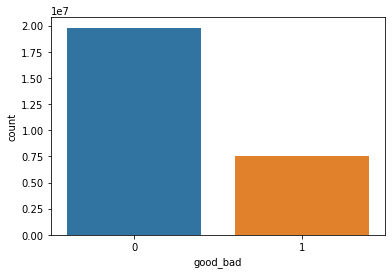

In [41]:
sns.countplot(bureau_balance['good_bad'])